---
# Data Science and Artificial Intelliegence Practicum
## 5-modul. Machine Learning
---

## 5.5 - Predicting house prices in Tashkent.

---
**CRISP-DM:**
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

---

**STEPS:**
1. Data Exploration
  1. Data Understanding
  2. Data Cleaning
  3. Analyzing Data
  4. Data Preparation
5. Pipeline for Feature Engineering
6. Modeling / Machine Learning
7. Evaluation
8. Saving the Model

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/blob/main/housing_data_08-02-2021.csv?raw=True")
df

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38,5,5,24500
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49,1,4,32000
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64,3,9,40000
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18,1,4,11000


### Definition of columns:

- `location` - address of the house for sale
- `district` - district where the house is located
- `rooms` - number of rooms
- `size` - house area (sq.m)
- `level` - level(floor) where the house located
- `max_levels` - total number of levels
- `price` - price of the house

### Data Exploration | Exploratory Data Analysis

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


We can see that there are no `NaN` values in the dataset. However, despite the fact that `size` and `price` columns are numbers, their data type is `object`. First, we convert these columns to numeric values.

#### Data Cleaning

In [21]:
size_col = np.array(df['size'], dtype='float64')
size_col

ValueError: could not convert string to float: 'Площадьземли:1сот'

In [22]:
df[df['size']=='Площадьземли:1сот']

,location,district,rooms,size,level,max_levels,price
5347,"город Ташкент, Яшнободский район, Дархон",Яшнободский,4,Площадьземли:1сот,3,5,150000


`size` column has non-numeric value: **'Площадьземли:1сот'**.\
It's like russian word *«сотка»* whichis is equal `100 m²`. [Wiki reference](https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D1%82%D0%BA%D0%B0#:~:text=%D0%90%D1%80%20(%D0%B2%20%D1%80%D0%B0%D0%B7%D0%B3%D0%BE%D0%B2%D0%BE%D1%80%D0%BD%D0%BE%D0%B9%20%D1%80%D0%B5%D1%87%D0%B8%20%D1%82%D0%B0%D0%BA%D0%B6%D0%B5%20%C2%AB%D1%81%D0%BE%D1%82%D0%BA%D0%B0%C2%BB%2C%20%D0%BE%D1%82%201/100%20%D0%B3%D0%B5%D0%BA%D1%82%D0%B0%D1%80%D0%B0)%C2%A0%E2%80%94%20%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D0%B5%D0%B4%D0%B8%D0%BD%D0%B8%D1%86%D0%B0%20%D0%B8%D0%B7%D0%BC%D0%B5%D1%80%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D0%B8%2C%20%D1%80%D0%B0%D0%B2%D0%BD%D0%B0%D1%8F%20100%C2%A0%D0%BC%C2%B2.)\
This means that we can convert this to a number.

In [23]:
df.loc[5347, 'size'] = 100
df.loc[[5347]]

,location,district,rooms,size,level,max_levels,price
5347,"город Ташкент, Яшнободский район, Дархон",Яшнободский,4,100,3,5,150000


In [24]:
size_col = np.array(df['size'], dtype='float64')
df['size'] = size_col

In [25]:
price_col = np.array(df['price'], dtype='float64')
price_col

ValueError: could not convert string to float: 'Договорная'

In [26]:
df[df['price']=='Договорная']

,location,district,rooms,size,level,max_levels,price
202,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,3,119.0,3,9,Договорная
411,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,4,160.0,4,9,Договорная
439,"город Ташкент, Мирзо-Улугбекский район, улица ...",Мирзо-Улугбекский,3,105.0,5,6,Договорная
460,"город Ташкент, Чиланзарский район, Чиланзар 1-...",Чиланзарский,3,90.0,6,8,Договорная
507,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,48.0,4,4,Договорная
...,...,...,...,...,...,...,...
7039,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.7,3,8,Договорная
7196,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,2,51.0,3,4,Договорная
7323,"город Ташкент, Мирзо-Улугбекский район, жилой ...",Мирзо-Улугбекский,6,208.0,1,7,Договорная
7403,"город Ташкент, Учтепинский район, Чиланзар 14-...",Учтепинский,2,35.0,2,9,Договорная


`price` column also has non-numeric values: **'Договорная'**, which we can translate as *'negotiable'*. We need to convert this value to `NaN` value in order to filling it later.

In [27]:
indices = df[df['price'] == 'Договорная'].index
df.loc[indices, 'price'] = np.nan
df.loc[indices]

,location,district,rooms,size,level,max_levels,price
202,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,3,119.0,3,9,NaN
411,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,4,160.0,4,9,NaN
439,"город Ташкент, Мирзо-Улугбекский район, улица ...",Мирзо-Улугбекский,3,105.0,5,6,NaN
460,"город Ташкент, Чиланзарский район, Чиланзар 1-...",Чиланзарский,3,90.0,6,8,NaN
507,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,48.0,4,4,NaN
...,...,...,...,...,...,...,...
7039,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.7,3,8,NaN
7196,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,2,51.0,3,4,NaN
7323,"город Ташкент, Мирзо-Улугбекский район, жилой ...",Мирзо-Улугбекский,6,208.0,1,7,NaN
7403,"город Ташкент, Учтепинский район, Чиланзар 14-...",Учтепинский,2,35.0,2,9,NaN


In [28]:
price_col = np.array(df['price'], dtype='float64')
df['price'] = price_col

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7565 non-null   object 
 1   district    7565 non-null   object 
 2   rooms       7565 non-null   int64  
 3   size        7565 non-null   float64
 4   level       7565 non-null   int64  
 5   max_levels  7565 non-null   int64  
 6   price       7466 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 413.8+ KB


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rooms,7565.0,2.625644,1.085201,1.0,2.0,3.0,3.0,10.0
size,7565.0,113.267236,1491.213517,1.0,50.0,66.0,86.0,70000.0
level,7565.0,3.699273,2.237275,1.0,2.0,3.0,5.0,19.0
max_levels,7565.0,6.038202,2.613271,1.0,4.0,5.0,9.0,25.0
price,7466.0,71334.210421,640523.683731,2.0,35000.0,46500.0,67000.0,52000000.0


We can see *outliers* in `price` and `size` column.

#### Visualization

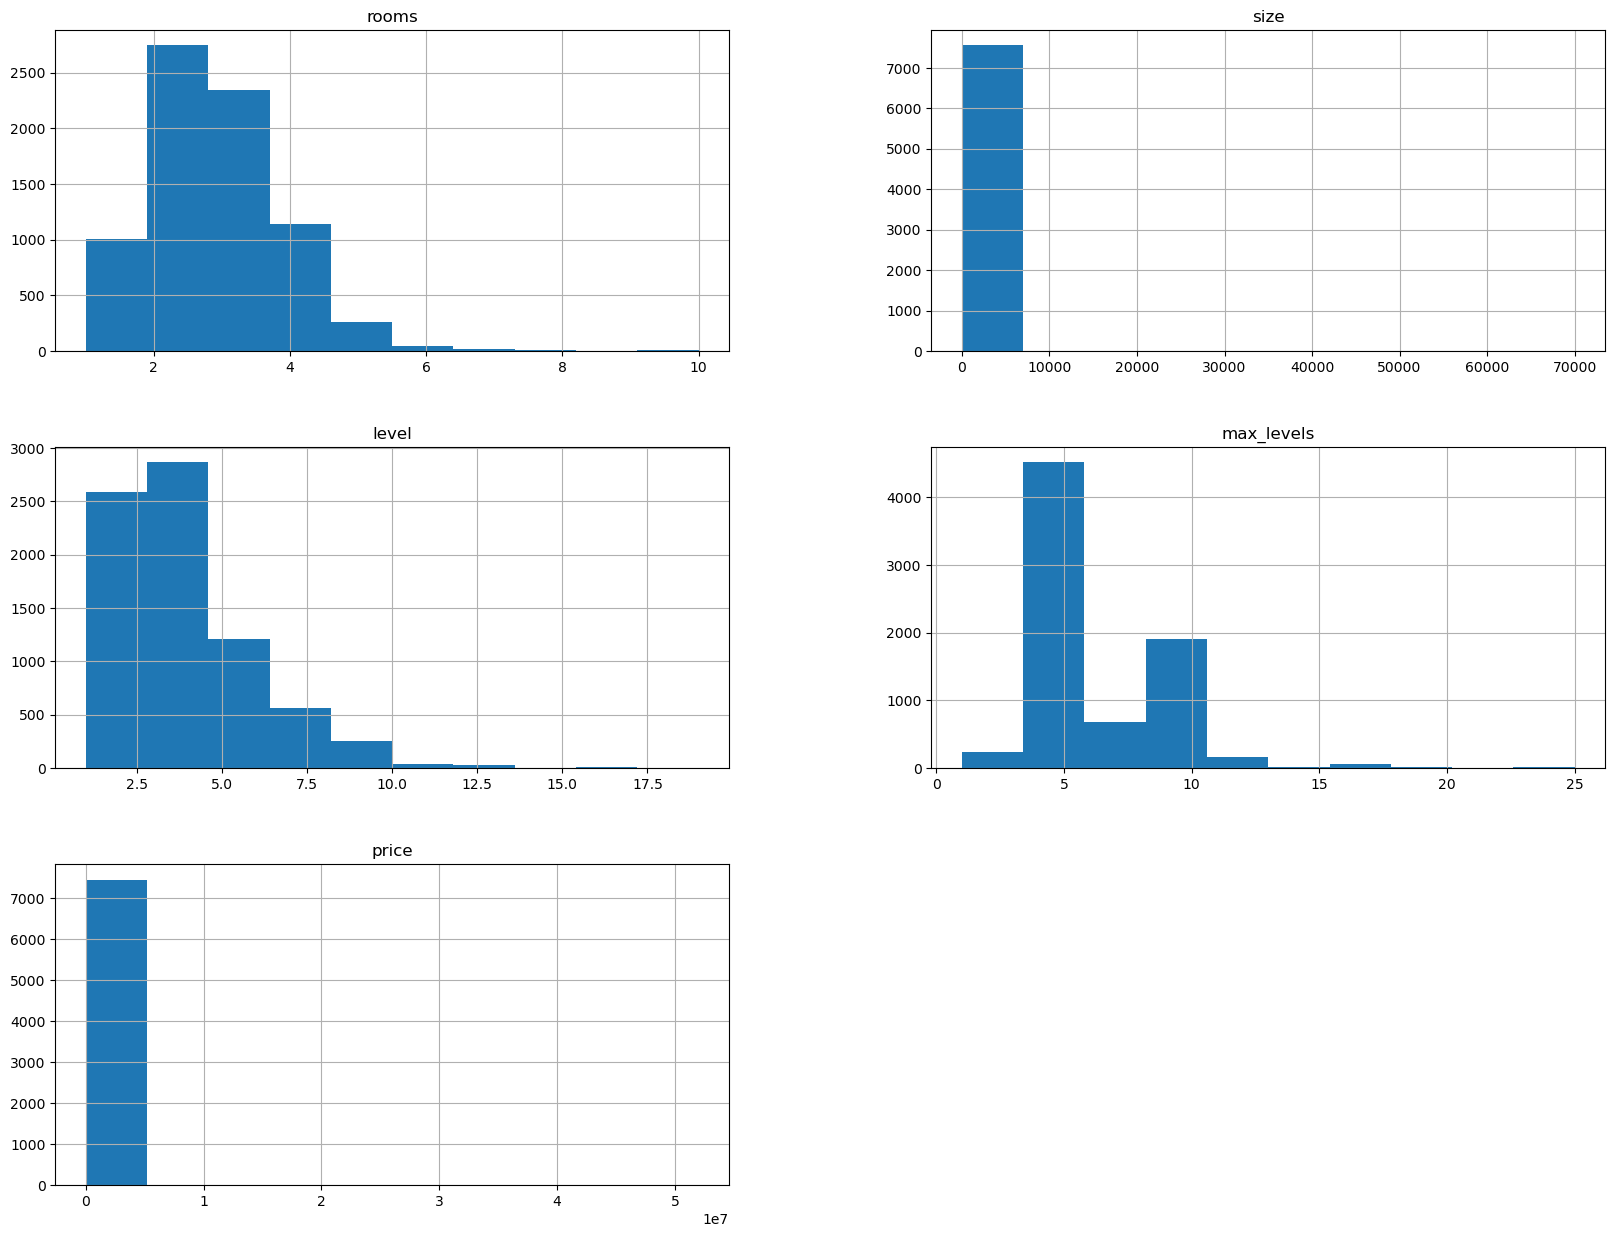

In [31]:
df.hist(bins=10, figsize=[20, 15]);

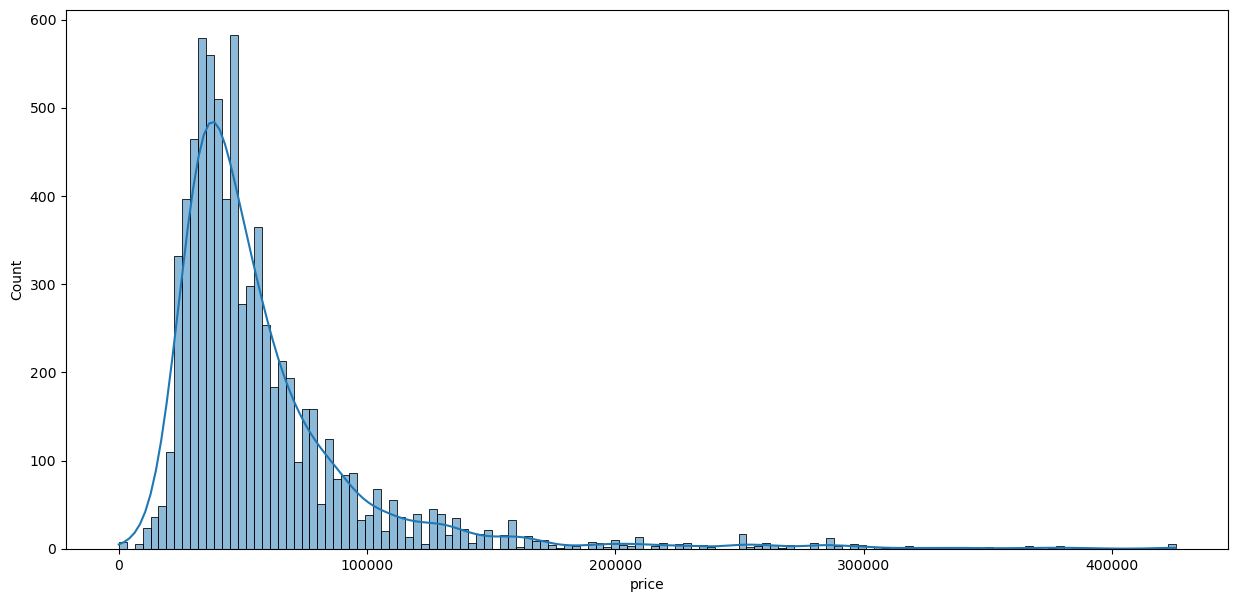

In [32]:
plt.figure(figsize=[15, 7])
sns.histplot(x=df[df['price'] < 500_000]['price'], kde=True);

There are many outliers in the `price` column, we need to correct them.

In [33]:
price_mask = (df['price'] >= 5000) & (df['price'] < 150_000)
df = df[price_mask]

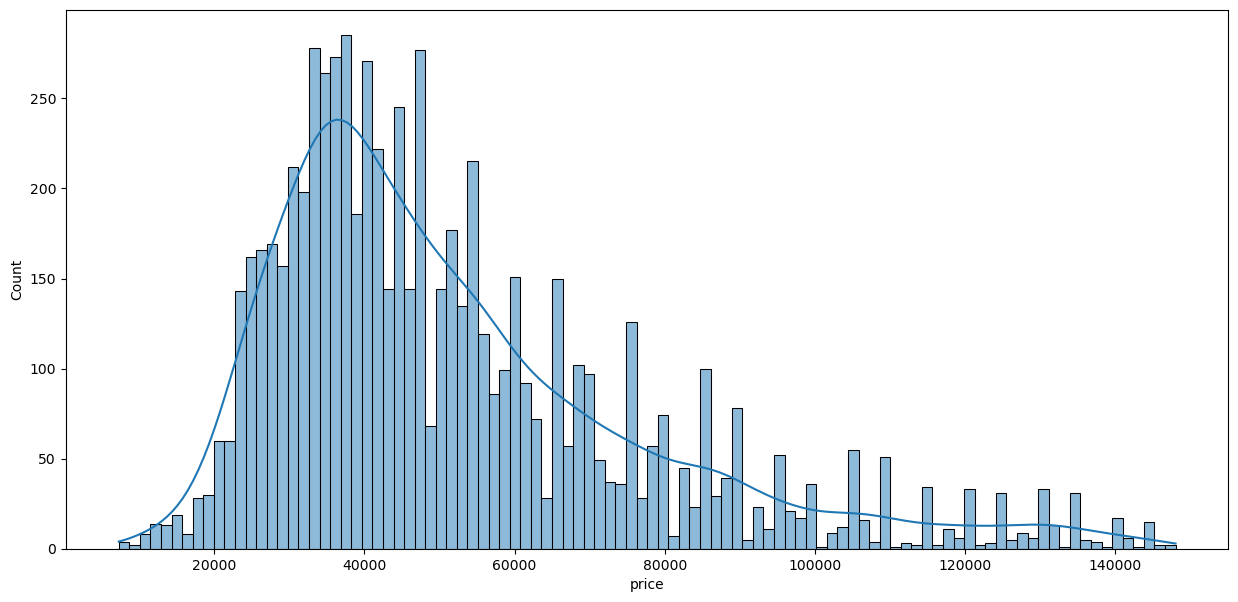

In [34]:
plt.figure(figsize=[15, 7])
sns.histplot(x=df['price'], kde=True, bins=100);

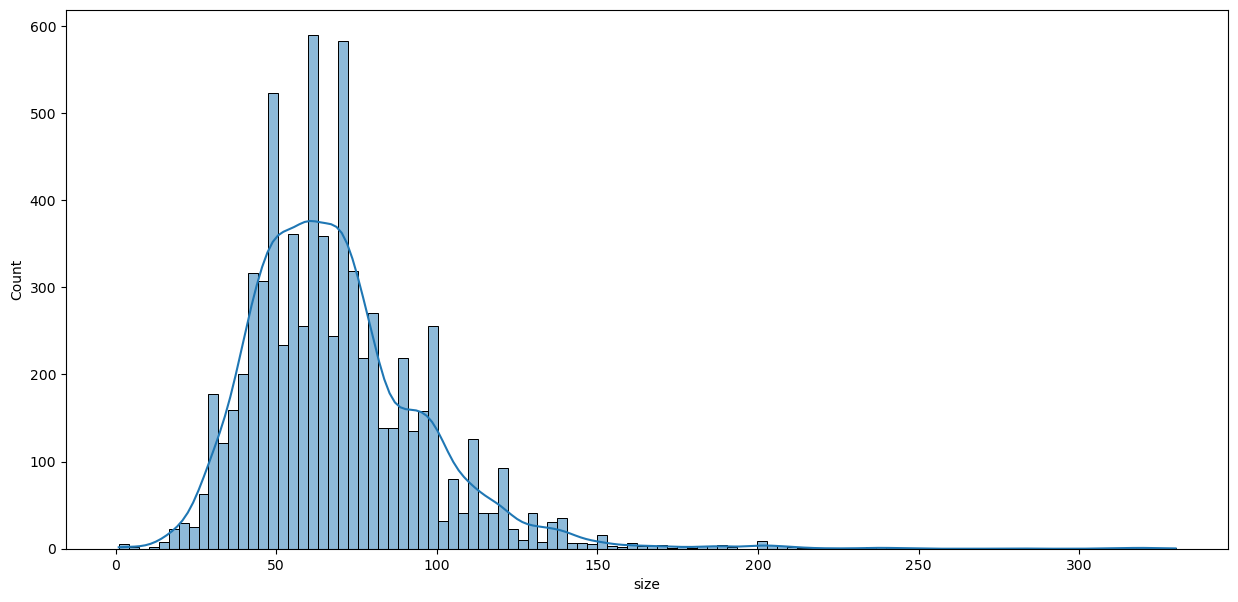

In [35]:
plt.figure(figsize=[15, 7])
sns.histplot(x=df[df['size'] < 3000]['size'], kde=True);

We remove outliers with values less than or equal to `10` and greater than or equal to `155` in the `size` column.

In [36]:
size_mask = (df['size'] >= 10) & (df['size'] <= 155)
df = df[size_mask]

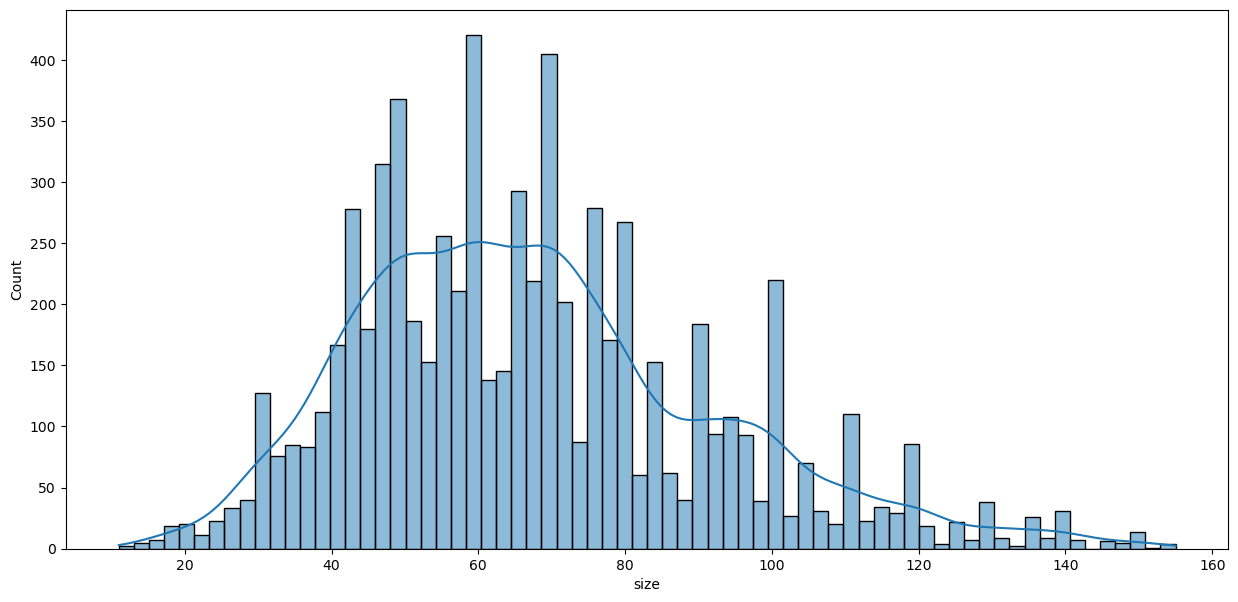

In [37]:
plt.figure(figsize=[15, 7])
sns.histplot(x=df['size'], kde=True, bins=70);

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rooms,7070.0,2.535078,0.993457,1.0,2.0,2.0,3.0,6.0
size,7070.0,67.621788,24.306545,11.0,50.0,65.0,80.0,155.0
level,7070.0,3.676803,2.222154,1.0,2.0,3.0,5.0,18.0
max_levels,7070.0,5.956153,2.586963,1.0,4.0,5.0,9.0,25.0
price,7070.0,51441.008911,24603.311716,7300.0,34500.0,45000.0,62000.0,148000.0


In [39]:
avg_price = df.groupby('district')['price'].mean().sort_values(ascending=False)
avg_price

district
Мирабадский          74785.387786
Шайхантахурский      60127.307018
Яккасарайский        58272.158598
Юнусабадский         53761.020531
Мирзо-Улугбекский    50530.390805
Олмазорский          48850.488189
Яшнободский          44832.683036
Учтепинский          44558.040230
Чиланзарский         43993.622642
Сергелийский         43417.426752
Янгихаётский         37000.000000
Бектемирский         29462.500000
Name: price, dtype: float64

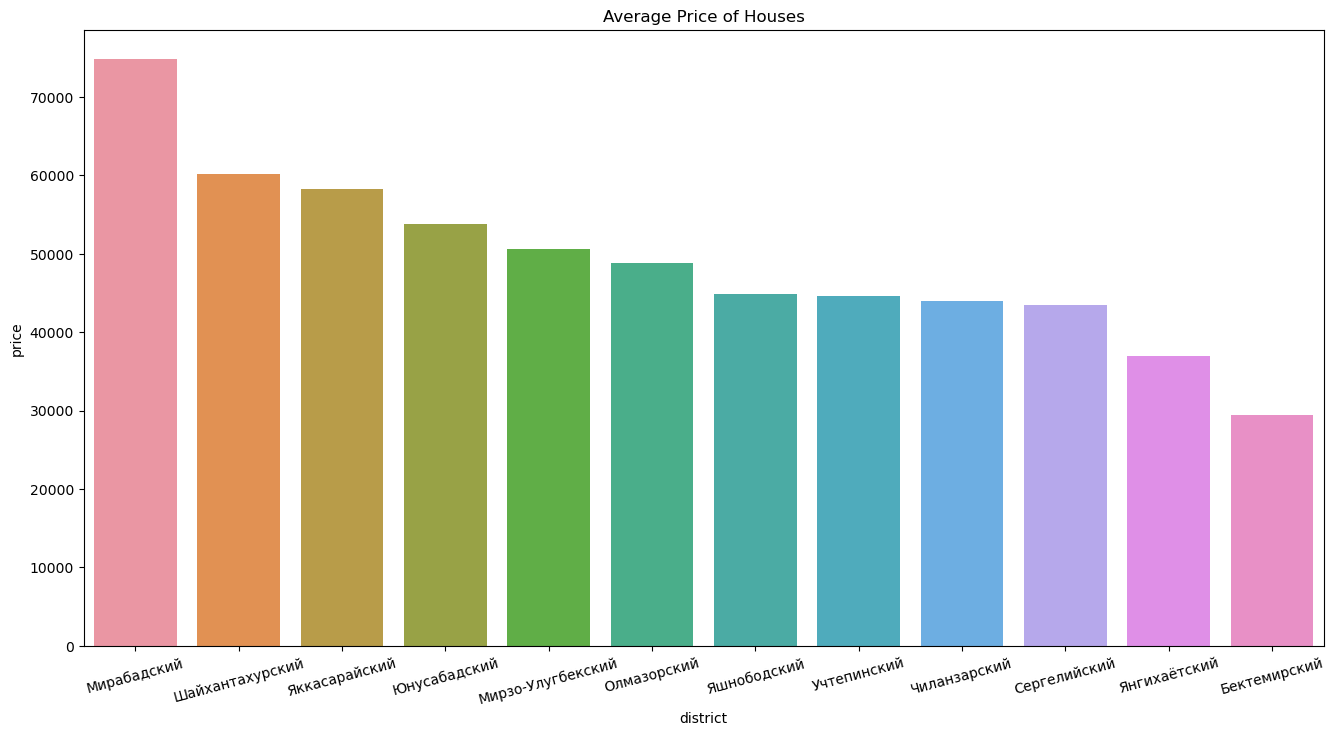

In [40]:
plt.figure(figsize=[16, 8])
sns.barplot(x=avg_price.index, y=avg_price)
plt.title("Average Price of Houses")
plt.xticks(rotation=15);

In [41]:
%matplotlib inline
df.corr(numeric_only=True).style.background_gradient(cmap='Blues')

,rooms,size,level,max_levels,price
rooms,1.000000,0.846877,0.141529,0.165177,0.619922
size,0.846877,1.000000,0.209476,0.320719,0.774511
level,0.141529,0.209476,1.000000,0.597209,0.076230
max_levels,0.165177,0.320719,0.597209,1.000000,0.252789
price,0.619922,0.774511,0.076230,0.252789,1.000000


In [ ]:
# sns.set(palette='deep')
# sns.set_palette('deep')

We can see there is good correlation between `price` and `size` columns.

In [ ]:
plt.figure(figsize=[15, 7])
sns.scatterplot(data=df, x='size', y='price');

In [ ]:
import warnings
warnings.simplefilter('ignore')

plt.figure(figsize=[18, 8])
sns.stripplot(data=df, x='rooms', y='price');

In [ ]:
plt.figure(figsize=[10, 5])
sns.histplot(x=df.rooms);

In [ ]:
plt.figure(figsize=[18, 8])
sns.swarmplot(data=df, x='max_levels', y='price');

In [ ]:
plt.figure(figsize=[18, 8])
sns.swarmplot(data=df, x='level', y='price');

In [ ]:
df.corrwith(df['price']).sort_values(ascending=False)

In [ ]:
df.head()

### Data Preparation | Feature Engineering

**Step by Step:**

**1.** Handling Missing Values \
**2.** Exploring and Creating New Features \
**3.** Encoding Categorical Values \
**4.** Feature Scaling

Since this is just an experiment and to avoid an unexpected modifications to the original df we will copy it to temporary df (We perform actual feature engineering with the pipeline):

---

In [ ]:
data = df.copy()
data.head()

#### Handling Missing Values

In [ ]:
# # Handling missing values (if we had NaN values)

# imputer = SimpleImputer(strategy="mean")
# num_cols = data.drop(['location', 'district'], axis=1).columns
# num_values = imputer.fit_transform(data[num_cols])
# data_num = pd.DataFrame(num_values, columns=num_cols, index=data[num_cols].index)
# data_num

We do not have any missing values. It is beacuase in the process of handling outliers in visualization part, we also got rid of `NaN` values.

#### Exploring New Features

We can create additional features from the current dataset in order to improve model accuracy:
- `room_size_ratio`: The ratio of the number of rooms to the size of the house. It could be useful in identifying houses that have more rooms than their size would suggest, or vice versa.

- `level_size_ratio`: The ratio of the number of levels to the size of the house. It could be useful in identifying houses that have more levels than their size would suggest, or vice versa.

- `price_per_sqrt`: The price of the house divided by its size. It could be useful in identifying how much a house costs per square root, which can be a useful comparison metric.

- `price_per_room`: The price of the house divided by the number of rooms. It could be useful in identifying how much a house costs per room, which can be a useful comparison metric.

- `level_maxlevels_ratio`: The ratio of levels of the house to the maximum possible levels of the house. It could be useful in identifying houses that have higher or lower levels than their maximum possible levels.

- `district_density`: We could use district column and count the number of houses in each district, and divide it by the size of the district to get a measure of the district density.

- `location_density`: Similar to district density, we could use location column and count the number of houses in each location, and divide it by the size of the location to get a measure of the location density.

In [ ]:
data['room_size_ratio'] = data['rooms'] / data['size']
data['level_size_ratio'] = data['level'] / data['size']
data['price_per_sqrt'] = data['price'] / data['size']
data['price_per_room'] = data['price'] / data['rooms']
data['level_maxlevels_ratio'] = data['level'] / data['max_levels']
# Create a new column for district density
district_counts = data['district'].value_counts()
data['district_density'] = data['district'].map(district_counts) / len(data)
# Create a new column for location density
location_counts = data['location'].value_counts()
data['location_density'] = data['location'].map(location_counts) / len(data)

In [ ]:
data.info()

In [ ]:
data.corrwith(data['price']).sort_values(ascending=False)

#### Encoding Categorical Values

In [ ]:
data.head()

In [ ]:
data['location'].value_counts()

This feature confusing, we remove it.

In [ ]:
data.drop('location', axis=1, inplace=True)
data.head()

We only have the `district` categorical column that has to be encoded.

In [ ]:
data[['district']].value_counts()

In [ ]:
cat_encoder = OneHotEncoder()
data_cat1hot = cat_encoder.fit_transform(df[['district']])
data_cat1hot.toarray()

#### Feature Scaling
We need to bring all values to a common range.

In [ ]:
data.describe().T

In [ ]:
data.head()

In [ ]:
standart_scaler = StandardScaler()
standart_scaler.fit_transform(data.iloc[:, 1:])

### Pipeline for Feature Engineering

We can combine all the processes so far into a single pipeline, with this, we can automate Feature Engineering:
  - Handling missing(`NaN`) values (`SimpleImputer`)
  - Encoding categorical values (`OneHotEncoder`)
  - Transformer for adding extra features
  - Scaling numeric values (`StandardScaler`)

And combine all and return 1 prepared dataset.

#### Transformer
Transformer for adding extra features for `X_train` set.

In [ ]:
df.shape

In [ ]:
# Split train and test set
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

In [ ]:
X_train.head()

In [ ]:
# Indices of columns we need in X_train
rooms_ix, size_ix, level_ix, max_levels_ix = 0, 1, 2, 3

class ExtraFeaturesAdder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self  # our function is transformer not estimator
    
    def transform(self, X):
        if type(X) != np.ndarray:
            X = X.values
        
        price_per_sqrt = price / X[:, size_ix]
        price_per_room = price / X[:, rooms_ix]
        level_size_ratio = X[:, level_ix] / X[:, size_ix]
        level_maxlevels_ratio = X[:, level_ix] / X[:, max_levels_ix]
        room_size_ratio = X[:, rooms_ix] / X[:, size_ix]
        # creating a new column for district density
        district_density = pd.Series(district).map(district.value_counts()) / len(X)

        return np.c_[X, price_per_sqrt, price_per_room, level_size_ratio,
                       district_density, level_maxlevels_ratio, room_size_ratio]

In [ ]:
num_cols = make_column_selector(dtype_include='number')
cat_col = ['district']

preprocessor_pipeline = make_column_transformer(
    (make_pipeline(ExtraFeaturesAdder(), StandardScaler()), num_cols),
    (OneHotEncoder(), cat_col)
)

In [ ]:
district = X_train['district'].copy()
price = y_train.copy()

X_train_set = preprocessor_pipeline.fit_transform(X_train)
X_train_set

The dataset is ready for Machine Learning!

---

### Modeling / Machine Learning

In [ ]:
# take a look at the shape of the train set
print(X_train_set.shape)
print(y_train.shape)

#### Linear Regression

In [ ]:
LR_model = LinearRegression()
# training a linear regression model
LR_model.fit(X_train_set, y_train)

Testing the model

In [ ]:
# select 5 random rows from X_train
test_data = X_train.sample(5)
test_data

In [ ]:
# we extract the prices corresponding to test_data
test_label = y_train.loc[test_data.index]
test_label

In [ ]:
# Preprocessing for test_data
district = test_data['district'].copy()
price = test_label.copy()

test_data_set = preprocessor_pipeline.transform(test_data)
test_data_set

In [ ]:
# Prediction
pred_test_data = LR_model.predict(test_data_set)
pred_test_data

In [ ]:
pd.DataFrame({'Prediction': pred_test_data, 'Real': test_label})

### Evaluation

In [ ]:
# Predictors for test set
X_test

In [ ]:
# Labels for test set
y_test

In [ ]:
# Preprocessing for X_test
district = X_test['district'].copy()
price = y_test.copy()

X_test_set = preprocessor_pipeline.transform(X_test)
X_test_set

In [ ]:
# Prediction
y_predict = LR_model.predict(X_test_set)

We use Root Mean Square Error (RMSE) to compare prediction and real data:

In [ ]:
lin_mse = mean_squared_error(y_test, y_predict)

print(f"RMSE: {np.sqrt(lin_mse)}")
print(f"MAE: {mean_absolute_error(y_test, y_predict)}")

We will try other models to see if there is a better result.

#### Decision Tree

In [ ]:
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_train_set, y_train)

In [ ]:
# prediction
y_pred = Tree_model.predict(X_test_set)

# evaluation
lin_mse = mean_squared_error(y_test, y_pred)

print(f"RMSE: {np.sqrt(lin_mse)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

*Better than before!*

#### Random Forest

In [ ]:
RF_model = RandomForestRegressor()
RF_model.fit(X_train_set, y_train)

In [ ]:
# prediction
y_pred = RF_model.predict(X_test_set)

# evaluation
lin_mse = mean_squared_error(y_test, y_pred)

print(f"RMSE: {np.sqrt(lin_mse)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

*Much better!*

### Cross-Validation

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
# Preprocessing for X dataset
district = X['district'].copy()
price = y.copy()

X_set = preprocessor_pipeline.transform(X)
X_set

In [ ]:
# Simple function for printing validation results
def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"Mean: {scores.mean()}")
    print(f"STD: {scores.std()}")

#### LinearRegression

In [ ]:
# validating with MSE
mse_scores = cross_val_score(LR_model, X_set, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-mse_scores)
# validating with MAE
LR_mae_scores = cross_val_score(LR_model, X_set, y, scoring="neg_mean_absolute_error", cv=10)

print("---------- RMSE scores: ----------")
display_scores(LR_rmse_scores)
print("\n---------- MAE scores: ----------")
display_scores(-LR_mae_scores)

#### DecisionTree

In [ ]:
# validating with MSE
mse_scores = cross_val_score(Tree_model, X_set, y, scoring="neg_mean_squared_error", cv=10)
Tree_rmse_scores = np.sqrt(-mse_scores)
# validating with MAE
Tree_mae_scores = cross_val_score(Tree_model, X_set, y, scoring="neg_mean_absolute_error", cv=10)

print("---------- RMSE scores: ----------")
display_scores(Tree_rmse_scores)
print("\n---------- MAE scores: ----------")
display_scores(-Tree_mae_scores)

#### RandomForest

In [ ]:
# validating with MSE
mse_scores = cross_val_score(RF_model, X_set, y, scoring="neg_mean_squared_error", cv=10)
RF_rmse_scores = np.sqrt(-mse_scores)
# validating with MAE
RF_mea_scores = cross_val_score(RF_model, X_set, y, scoring="neg_mean_absolute_error", cv=10)

print("---------- RMSE scores: ----------")
display_scores(RF_rmse_scores)
print("\n---------- MAE scores: ----------")
display_scores(-RF_mea_scores)

**Conclusion:**

The best performing model -> *RF_model - RandomForestRegressor*. `RMSE: ~1150` and `MAE: ~340`

---

### Saving the Model

`!pip install joblib`

In [ ]:
import joblib

joblib.dump(RF_model, "Tashkent_house_price_rf_pred.jbl")

**Using the model:**

In [ ]:
model = joblib.load("tashkent_house_price_pred.jbl")

In [ ]:
model.score(X_test_set, y_test)